# Diabetes Prediction using ANN

In this use case it will check whether person is having diabetes or not. To check diabetes there are different parameters like Glucose, Blood Pressure, Insulin, Skin Thickness, etc.

## Work Flow
- Data Collection
- Data Pre-processing
- Data Analysis
- Train Test Split
- Model Creation
- Model Evaluation
- Hyper Parameter Tuning
- Creating Web App using Flask
- Run the Web App using Docker

### Data Collection
Collected diabetes data from kaggle.

Dataset Link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

The data have Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age of person (years)
- Outcome: Whether person have diabetes or not

### Load Data

In [1]:
import pandas as pd

# Exercise Data
diabetes_df = pd.read_csv('Dataset/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Pre-processing

In [2]:
# Check shape of the dataset
diabetes_df.shape

(768, 9)

In [3]:
# Get basick information of dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check null values in the dataset
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Analysis

In [5]:
# Get statistical measures of the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [7]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In outcome column<br>
0 -- Non-diabetic<br>
1 -- Diabetic

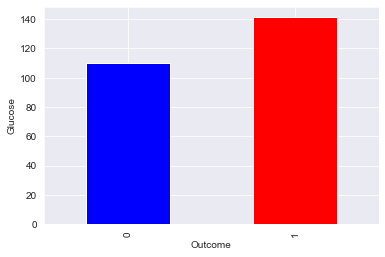

In [8]:
# Check average glucose level of non-diabetic and diabetic person
diabetes_df.groupby('Outcome').mean()['Glucose'].plot(kind='bar', color=['blue', 'red'])
plt.ylabel('Glucose')
plt.show()

<b>Note:</b> Here you can see person has less glucose level who are non-diabetic as compared to diabetic.

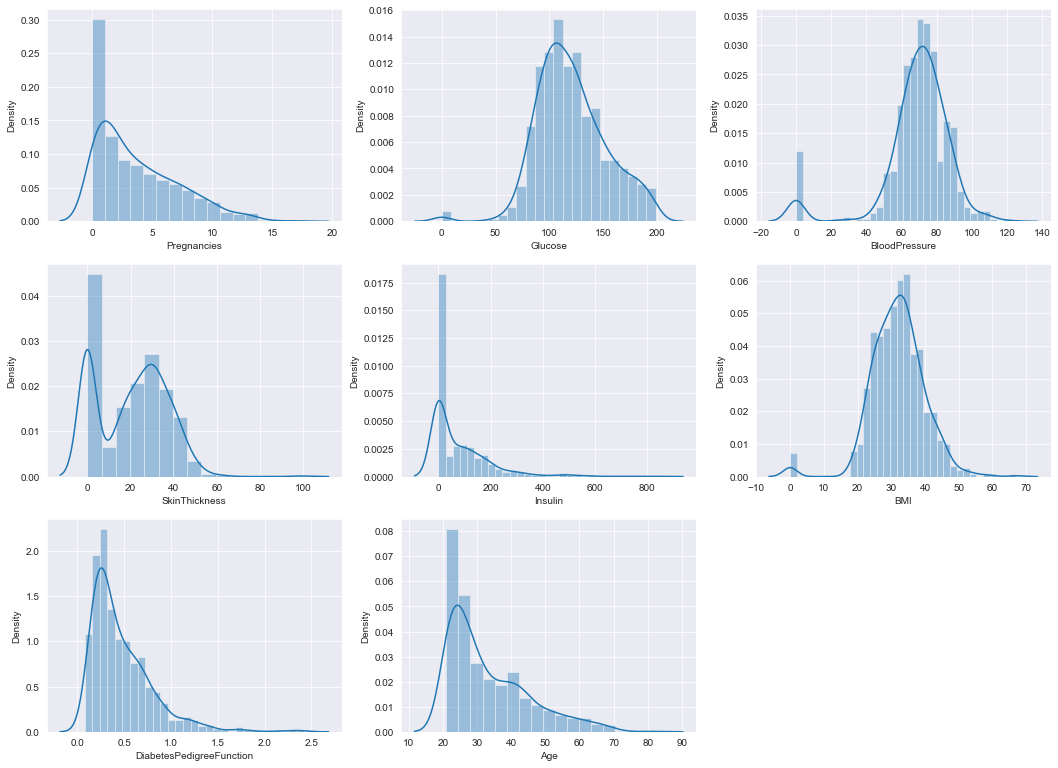

In [9]:
# Check distribution of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
plt.figure(figsize=(18,18))

plt.subplot(4,3,1)
sns.distplot(diabetes_df['Pregnancies'])

plt.subplot(4,3,2)
sns.distplot(diabetes_df['Glucose'])

plt.subplot(4,3,3)
sns.distplot(diabetes_df['BloodPressure'])

plt.subplot(4,3,4)
sns.distplot(diabetes_df['SkinThickness'])

plt.subplot(4,3,5)
sns.distplot(diabetes_df['Insulin'])

plt.subplot(4,3,6)
sns.distplot(diabetes_df['BMI'])

plt.subplot(4,3,7)
sns.distplot(diabetes_df['DiabetesPedigreeFunction'])

plt.subplot(4,3,8)
sns.distplot(diabetes_df['Age'])

plt.show()

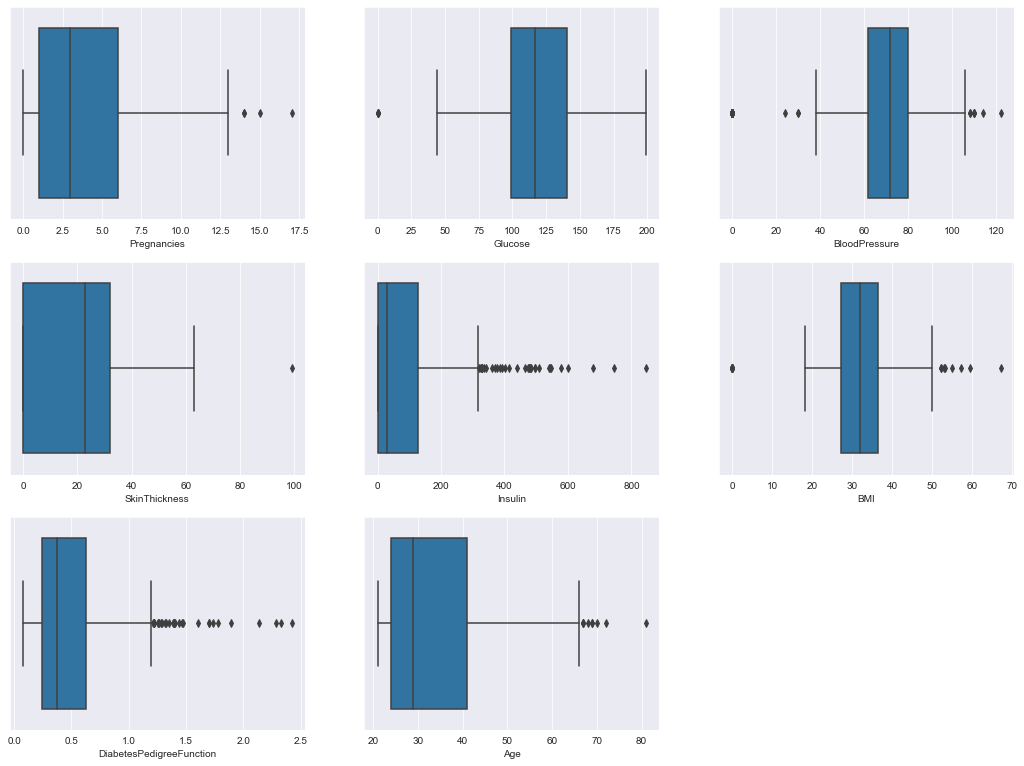

In [10]:
# Check outliers in Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
plt.figure(figsize=(18,18))

plt.subplot(4,3,1)
sns.boxplot(diabetes_df['Pregnancies'])

plt.subplot(4,3,2)
sns.boxplot(diabetes_df['Glucose'])

plt.subplot(4,3,3)
sns.boxplot(diabetes_df['BloodPressure'])

plt.subplot(4,3,4)
sns.boxplot(diabetes_df['SkinThickness'])

plt.subplot(4,3,5)
sns.boxplot(diabetes_df['Insulin'])

plt.subplot(4,3,6)
sns.boxplot(diabetes_df['BMI'])

plt.subplot(4,3,7)
sns.boxplot(diabetes_df['DiabetesPedigreeFunction'])

plt.subplot(4,3,8)
sns.boxplot(diabetes_df['Age'])

plt.show()

Correlation:<br>
It is used to check relationship between two columns.
- Positive Correlation - It means if one feature increases then another feature also increases. In other words both feature are directly proportional to each other.
- Negative Correlation - Itmeans if one featyre increases then another feature decreases. In other words both feature are inversely proportional to each other.
- No Correlation - If there is 0 value it means there is no correlation.

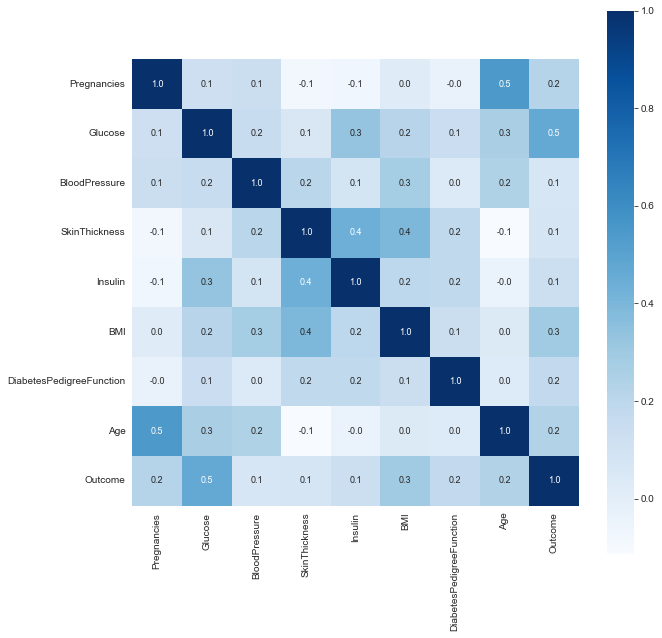

In [11]:
# Check correlation of each column using heat map
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(), annot=True, square=True, fmt='.1f', annot_kws={'size': 9}, cmap='Blues')
plt.show()

### Train Test Split

In [64]:
# Seperating Dependent & Independent columns
x = diabetes_df.iloc[:, :-1] # Independent columns
y = diabetes_df.iloc[:, -1:] # Dependent columns

In [65]:
# Shape of x and y
x.shape, y.shape

((768, 8), (768, 1))

In [66]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [67]:
# Shape of x_train, x_test, y_train, and y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

### Model Creation

In [68]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [115]:
# Check data is imbalanced or not
from collections import Counter
Counter(y_train['Outcome'])

Counter({0: 401, 1: 213})

In [198]:
# Handing imbalanced data
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [ ]:
# SMOTE is an over sampling technique where it generates synthetic data on minority class
# sm = SMOTE(0.75)
# x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
# print(f'The number of classes berfore fit {Counter(y_train["Outcome"])}')
# print(f'The number of classes after fit {Counter(y_train_sm["Outcome"])}')

In [204]:
# SMOTETomek is combination of over sampling and under sampling technique where it removes as well as generates synthetic data
sm = SMOTETomek(0.75)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(f'The number of classes berfore fit {Counter(y_train["Outcome"])}')
print(f'The number of classes after fit {Counter(y_train_sm["Outcome"])}')

The number of classes berfore fit Counter({0: 401, 1: 213})
The number of classes after fit Counter({0: 373, 1: 272})


In [205]:
# Libraries required for ANN
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [206]:
# ANN Architecture

# Initializing ANN
model = Sequential()

# Adding first hidden layer and input layer
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim=8))

# Dropout - To reduce overfitting it will disable 30% of the neurons randomly in each iteration
model.add(Dropout(0.3))

# Adding second hidden layer
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))

# Dropout - To reduce overfitting it will disable 30% of the neurons randomly in each iteration
model.add(Dropout(0.3))

# Adding output layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [207]:
# Model Summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                288       
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Model Training
model_history = model.fit(x_train_sm, y_train_sm, batch_size=32, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 7ms/step - loss: 0.8919 - accuracy: 0.5907 - val_loss: 0.7086 - val_accuracy: 0.6299
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6574 - val_loss: 0.6329 - val_accuracy: 0.7143
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6899 - val_loss: 0.5932 - val_accuracy: 0.7597
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6946 - val_loss: 0.5762 - val_accuracy: 0.7597
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.7364 - val_loss: 0.5687 - val_accuracy: 0.7597
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7209 - val_loss: 0.5737 - val_accuracy: 0.7792
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7442 - val_loss: 0.5475 - val_accuracy: 0.7857
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7814 - val_loss: 0.5176 - val_accuracy: 0.8182
Epoch 60/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8016 - val_loss: 0.5155 - val_accuracy: 0.8182
Epoch 61/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7938 - val_loss: 0.5147 - val_accuracy: 0.8182
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8155 - val_loss: 0.5159 - val_accuracy: 0.8182
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7953 - val_loss: 0.5152 - val_accuracy: 0.8117
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8140 - val_loss: 0.5134 - val_accuracy: 0.8117
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.7891 - val_loss: 0.5077 - val_accuracy: 0.8182
Epoch 

### Model Evaluation
Evaluation Metrics for Classification: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

In [209]:
# Evaluation metrics for each epoch
hist = pd.DataFrame(model_history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.891868,0.590698,0.708631,0.629870
1,0.671525,0.657364,0.632878,0.714286
2,0.633573,0.689922,0.593206,0.759740
3,0.611050,0.694574,0.576188,0.759740
4,0.575610,0.736434,0.568679,0.759740
...,...,...,...,...
95,0.419729,0.804651,0.513245,0.818182
96,0.418230,0.806202,0.513293,0.818182
97,0.435105,0.798450,0.511513,0.818182
98,0.389759,0.827907,0.510003,0.818182


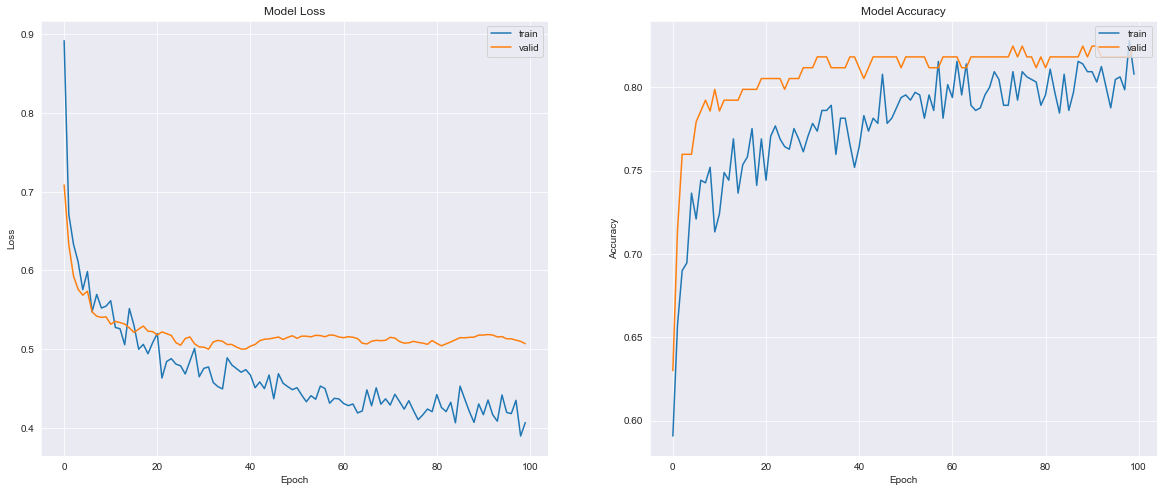

In [210]:
# Evaluating model train and validation loss and accuracy

# Size of plot
plt.figure(figsize=(20, 8))

# Subplot 1 for train and validation loss
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')

# Subplot 2 for train and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='upper right')

plt.show()

In [211]:
# Prediction on test data
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)

5/5 [==============================] - 0s 1ms/step


In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [213]:
# Accuracy Score
accuracy_score(y_test, y_pred)

0.8246753246753247

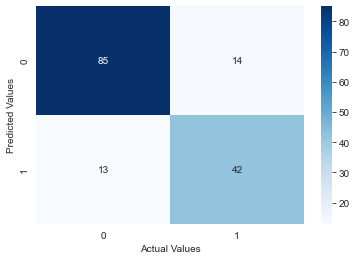

In [214]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<b>Note:</b> More focus should be on reducing FP or improving the precision.

In [215]:
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        99
           1       0.75      0.76      0.76        55

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.83      0.82      0.83       154



In [240]:
# Save Model
model.save('diabetes.h5')

In [248]:
# Load Model
from tensorflow.python.keras.models import load_model

model = load_model('diabetes.h5')

In [249]:
# Save scaler object
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [250]:
# Load scaler object
with open('scaler.pkl', 'rb') as file:
    sc = pickle.load(file)

In [251]:
# Creating Pipeline
from sklearn.pipeline import Pipeline

diabetes_pipeline = Pipeline(steps=[
    ('scaling', sc),
    ('model', model)
])

In [252]:
# Predicting output on single data
import numpy as np
# diabetes_test = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
diabetes_test = [1, 120, 64, 40, 105, 34.0, 0.35, 50]
diabetes_test = np.array(diabetes_test) # convert to a numpy array
diabetes_test = np.expand_dims(diabetes_test, 0) # change shape from (8,) to (1,8)
prediction = 'Diabetic' if (diabetes_pipeline.predict(diabetes_test)[0,0] > 0.5) else 'Non-Diabetic'
print(prediction)

Non-Diabetic


### Hyper Parameter Tuning with KerasTuner 
Decide number of hidden layers and neurons in Neural Network<br>
Link: https://www.analyticsvidhya.com/blog/2021/06/tuning-hyperparameters-of-an-artificial-neural-network-leveraging-keras-tuner/

In [255]:
from kerastuner import HyperModel
import kerastuner as kt
import tensorflow as tf

class ANNHyperModel(HyperModel):
    def build(self, hp):
        # Initializing ANN
        model = tf.keras.models.Sequential()

        # Tune the number of layers.
        for i in range(hp.Int("num_layers", min_value=2, max_value=20)):
            # Adding hidden layers
            model.add(
                tf.keras.layers.Dense(
                    # Tune number of neurons in each layer.
                    units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                    kernel_initializer = 'he_uniform',
                    activation='relu',
                )
            )
            
            # Dropout Layer to avoid overfitting
            if hp.Boolean("dropout"):
                model.add(tf.keras.layers.Dropout(rate=0.3))

        # Adding output layer
        model.add(tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform', activation="sigmoid"))
        
        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        # Compiling the ANN
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy'],
        )

        return model

# Initializing HyperModel
hypermodel = ANNHyperModel()

# It take random combination values to train model
tuner = kt.RandomSearch(
    hypermodel,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_dir",
    project_name="Diabetes Prediction",
)

# Start the search for the best hyperparameter configuration
tuner.search(x_train_sm, y_train_sm, epochs=50, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.8116883039474487

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 02m 25s
INFO:tensorflow:Oracle triggered exit


In [256]:
# Get the top 1 models.
models = tuner.get_best_models(num_models=1)
best_model = models[0]

best_model.build(input_shape=x_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (614, 256)                2304      
                                                                 
 dropout (Dropout)           (614, 256)                0         
                                                                 
 dense_1 (Dense)             (614, 256)                65792     
                                                                 
 dropout_1 (Dropout)         (614, 256)                0         
                                                                 
 dense_2 (Dense)             (614, 416)                106912    
                                                                 
 dropout_2 (Dropout)         (614, 416)                0         
                                                                 
 dense_3 (Dense)             (614, 224)                9

In [257]:
# Now you can train the best_model
best_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
14/14 [==============================] - 2s 37ms/step - loss: 0.5382 - accuracy: 0.7110 - val_loss: 0.4828 - val_accuracy: 0.7514
Epoch 2/10
14/14 [==============================] - 0s 13ms/step - loss: 0.4779 - accuracy: 0.7413 - val_loss: 0.4474 - val_accuracy: 0.7838
Epoch 3/10
14/14 [==============================] - 0s 15ms/step - loss: 0.4893 - accuracy: 0.7576 - val_loss: 0.4533 - val_accuracy: 0.7784
Epoch 4/10
14/14 [==============================] - 0s 14ms/step - loss: 0.5051 - accuracy: 0.7459 - val_loss: 0.4946 - val_accuracy: 0.7730
Epoch 5/10
14/14 [==============================] - 0s 20ms/step - loss: 0.5237 - accuracy: 0.7343 - val_loss: 0.4773 - val_accuracy: 0.7730
Epoch 6/10
14/14 [==============================] - 0s 36ms/step - loss: 0.4972 - accuracy: 0.7669 - val_loss: 0.4852 - val_accuracy: 0.7784
Epoch 7/10
14/14 [==============================] - 0s 14ms/step - loss: 0.5087 - accuracy: 0.7646 - val_loss: 0.4784 - val_accuracy: 0.7568
Epoch 8/10
14

### Creating Web App using Flask
Created simple UI using flask framework.

### Run the Web App using Docker
Created docker image of web app and run it into docker container